# **PCD - Pertemuan 9**

## Import Library

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow

## Menentukan Path

In [ ]:
image_path1 = 'gambar3.jpeg'
image_path2 = 'gambar2.jpeg'

## Latihan 1: Eksperimen Operasi Morfologi pada Kanal Terpisah

--- Hasil Latihan 1 ---


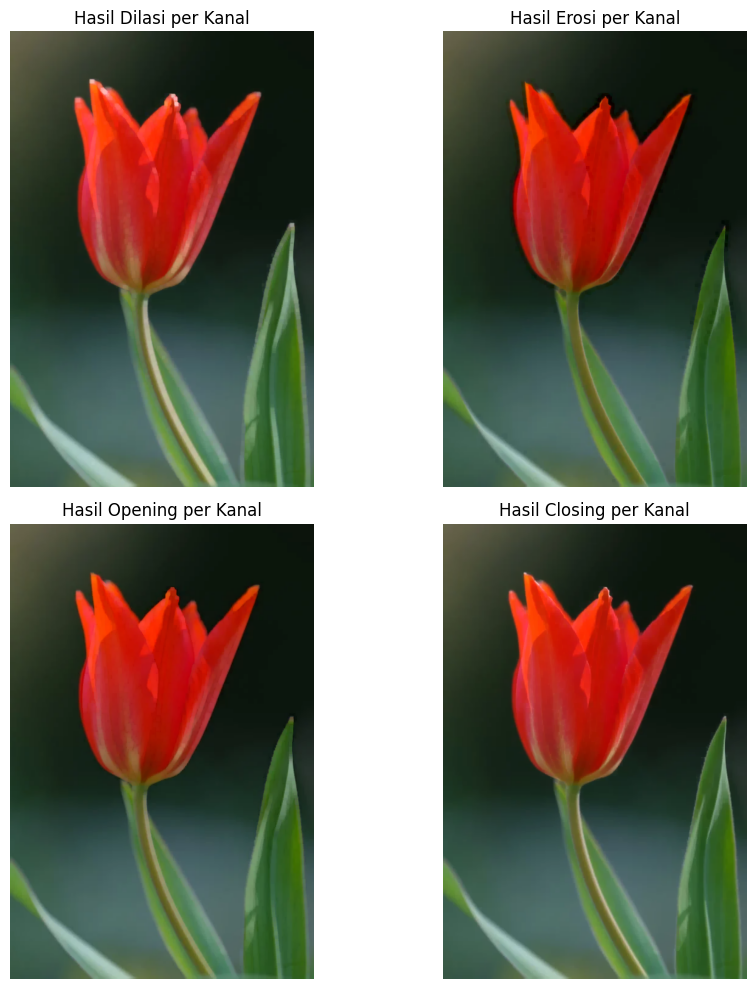

In [ ]:
if os.path.exists(image_path1):
    # Muat citra warna dan konversi ke RGB
    img_latihan1 = cv2.imread(image_path1)
    img_latihan1_rgb = cv2.cvtColor(img_latihan1, cv2.COLOR_BGR2RGB)

    # Pisahkan kanal R, G, B
    b, g, r = cv2.split(img_latihan1)

    # Definisikan kernel 5x5
    kernel = np.ones((5, 5), np.uint8)

    # Lakukan operasi pada setiap kanal
    r_dilasi, g_dilasi, b_dilasi = cv2.dilate(r, kernel, iterations=1), cv2.dilate(g, kernel, iterations=1), cv2.dilate(b, kernel, iterations=1)
    r_erosi, g_erosi, b_erosi = cv2.erode(r, kernel, iterations=1), cv2.erode(g, kernel, iterations=1), cv2.erode(b, kernel, iterations=1)
    r_opening, g_opening, b_opening = cv2.morphologyEx(r, cv2.MORPH_OPEN, kernel), cv2.morphologyEx(g, cv2.MORPH_OPEN, kernel), cv2.morphologyEx(b, cv2.MORPH_OPEN, kernel)
    r_closing, g_closing, b_closing = cv2.morphologyEx(r, cv2.MORPH_CLOSE, kernel), cv2.morphologyEx(g, cv2.MORPH_CLOSE, kernel), cv2.morphologyEx(b, cv2.MORPH_CLOSE, kernel)

    # Gabungkan kanal kembali
    img_dilasi = cv2.merge([b_dilasi, g_dilasi, r_dilasi])
    img_erosi = cv2.merge([b_erosi, g_erosi, r_erosi])
    img_opening = cv2.merge([b_opening, g_opening, r_opening])
    img_closing = cv2.merge([b_closing, g_closing, r_closing])

    # Konversi ke RGB untuk ditampilkan
    img_dilasi_rgb = cv2.cvtColor(img_dilasi, cv2.COLOR_BGR2RGB)
    img_erosi_rgb = cv2.cvtColor(img_erosi, cv2.COLOR_BGR2RGB)
    img_opening_rgb = cv2.cvtColor(img_opening, cv2.COLOR_BGR2RGB)
    img_closing_rgb = cv2.cvtColor(img_closing, cv2.COLOR_BGR2RGB)

    # Tampilkan hasil
    print("--- Hasil Latihan 1 ---")
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1); plt.imshow(img_dilasi_rgb); plt.title('Hasil Dilasi per Kanal'); plt.axis('off')
    plt.subplot(2, 2, 2); plt.imshow(img_erosi_rgb); plt.title('Hasil Erosi per Kanal'); plt.axis('off')
    plt.subplot(2, 2, 3); plt.imshow(img_opening_rgb); plt.title('Hasil Opening per Kanal'); plt.axis('off')
    plt.subplot(2, 2, 4); plt.imshow(img_closing_rgb); plt.title('Hasil Closing per Kanal'); plt.axis('off')
    plt.tight_layout()
    plt.show()

else:
    print(f"Tidak dapat menjalankan Latihan 1 karena '{image_path1}' tidak ditemukan.")

**Analisis Latihan 1 (Bunga Tulip)**

- **Dilasi:** Kelopak bunga merah terlihat sedikit lebih besar dan "mekar" dibandingkan aslinya. Batas antara bunga dan latar belakang menjadi kurang tajam, dan warna merah tampak sedikit lebih dominan atau 'bocor' ke area sekitarnya. Daun hijau juga terlihat sedikit lebih tebal. Ini terjadi karena area terang (merah dan hijau) di setiap kanal diperluas.

- **Erosi:** Kelopak bunga tampak menyusut, menjadi lebih ramping. Detail halus seperti garis gelap di dalam kelopak mungkin menjadi lebih jelas, atau sebaliknya, area merah yang tipis bisa hilang. Batas bunga menjadi lebih tajam tetapi lebih kecil. Daun juga terlihat lebih kurus. Ini karena area terang di setiap kanal dikikis.

- **Opening:** Hasilnya mirip dengan erosi, tetapi bentuk bunga secara keseluruhan lebih terjaga. Bintik-bintik terang yang mungkin ada (noise) akan hilang, tetapi bunga tidak tampak sekecil pada hasil erosi murni. Tepi bunga terlihat lebih halus dibandingkan citra asli.

- **Closing:** Bunga terlihat lebih "padat" dibandingkan aslinya. Celah-celah gelap kecil yang mungkin ada di antara kelopak atau pada daun akan tertutup. Ukuran bunga mirip dengan dilasi, tetapi tidak terlalu 'bengkak', dan bentuknya lebih solid.

- **Efek Warna:** Karena operasi dilakukan per kanal, mungkin ada sedikit pergeseran warna atau color fringing (pinggiran warna aneh) di tepi objek, meskipun pada gambar tulip ini efeknya tidak terlalu kentara.

## Latihan 2: Penggunaan Opening dan Closing pada Citra Warna Kompleks

Perbandingan Hasil Latihan 2:


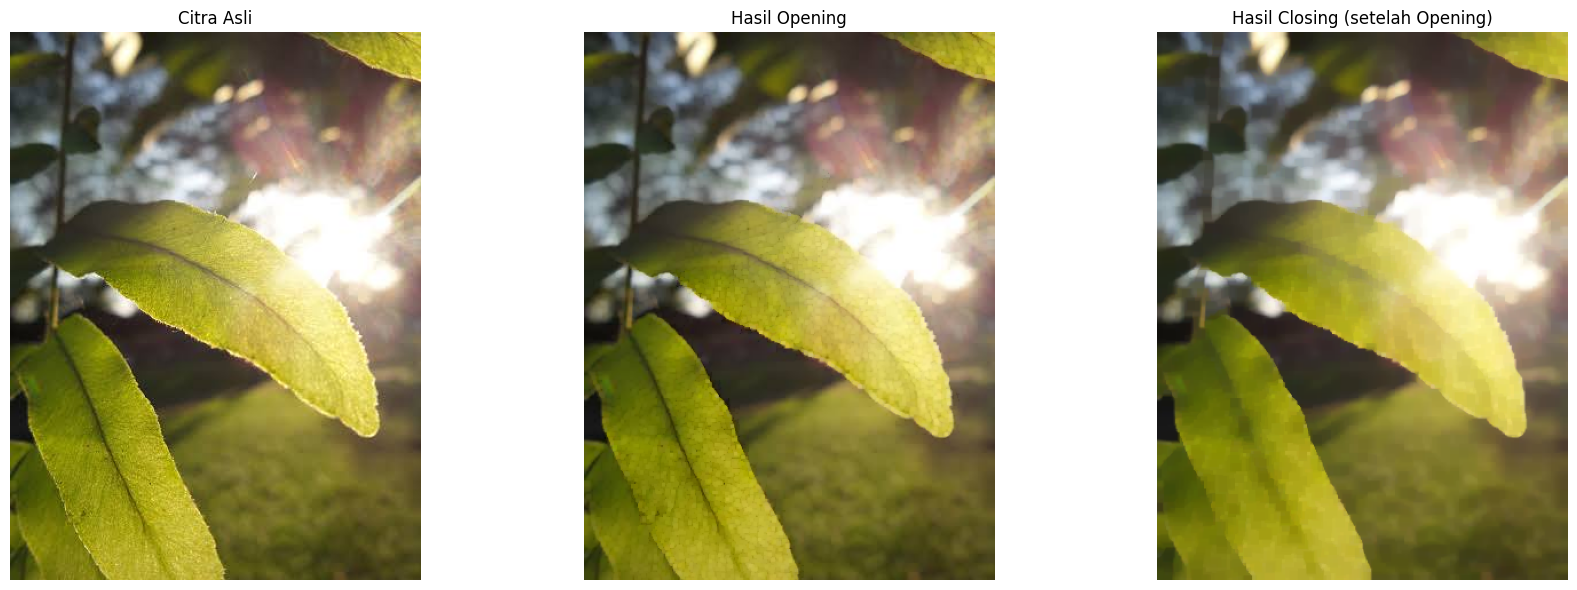

In [ ]:
if os.path.exists(image_path2):
    # --- 1. Muat Citra ---
    img_latihan2 = cv2.imread(image_path2)
    img_latihan2_rgb = cv2.cvtColor(img_latihan2, cv2.COLOR_BGR2RGB)

    # --- 2. Terapkan Opening ---
    # Definisikan kernel (coba kernel 3x3 untuk noise halus)
    kernel_open = np.ones((3, 3), np.uint8)
    # Terapkan opening
    img_opening_l2 = cv2.morphologyEx(img_latihan2, cv2.MORPH_OPEN, kernel_open, iterations=1)
    img_opening_l2_rgb = cv2.cvtColor(img_opening_l2, cv2.COLOR_BGR2RGB)

    # --- 3. Terapkan Closing ---
    # Definisikan kernel (coba kernel 7x7 atau sesuaikan)
    kernel_close = np.ones((7, 7), np.uint8)
    # Terapkan closing pada hasil opening
    img_closing_l2 = cv2.morphologyEx(img_opening_l2, cv2.MORPH_CLOSE, kernel_close, iterations=1)
    img_closing_l2_rgb = cv2.cvtColor(img_closing_l2, cv2.COLOR_BGR2RGB)

    # --- 4. Tampilkan Hasil Berdampingan ---
    print("Perbandingan Hasil Latihan 2:")

    # Buat figure dengan 1 baris dan 3 kolom
    fig, axs = plt.subplots(1, 3, figsize=(18, 6)) # figsize=(lebar, tinggi) dalam inci

    # Tampilkan Citra Asli di kolom 1
    axs[0].imshow(img_latihan2_rgb)
    axs[0].set_title('Citra Asli')
    axs[0].axis('off') # Sembunyikan sumbu

    # Tampilkan Hasil Opening di kolom 2
    axs[1].imshow(img_opening_l2_rgb)
    axs[1].set_title('Hasil Opening')
    axs[1].axis('off')

    # Tampilkan Hasil Closing di kolom 3
    axs[2].imshow(img_closing_l2_rgb)
    axs[2].set_title('Hasil Closing (setelah Opening)')
    axs[2].axis('off')

    plt.tight_layout() # Atur layout agar rapi
    plt.show() # Tampilkan plot

else:
    print(f"ERROR: File '{image_path2}' tidak ditemukan! Pastikan Anda sudah mengunggahnya.")


**Analisis Latihan 2 (Daun)**

- **Citra Asli:** Tampak objek daun di depan dengan latar belakang yang terang dan blur (bokeh). Terdapat bintik-bintik cahaya yang sangat terang di latar belakang, yang bisa dianggap sebagai noise atau gangguan visual. Daun itu sendiri memiliki bentuk yang jelas.

- **Hasil Opening:** Perubahan yang paling signifikan adalah hilangnya atau berkurangnya intensitas bintik-bintik cahaya terang di latar belakang. Opening berhasil menghilangkan objek-objek terang yang kecil (noise). Bentuk daun utama relatif tidak berubah, meskipun mungkin ada sedikit 'penghalusan' di tepinya. - Latar belakang menjadi lebih gelap dan kurang 'berisik'.

- **Hasil Closing:** Dibandingkan dengan hasil opening, daun pada hasil closing tampak sedikit lebih 'solid' dan 'penuh'. Jika ada lubang-lubang kecil atau celah gelap tipis pada daun (yang mungkin tidak terlihat jelas pada resolusi ini), closing akan berusaha menutupnya. Efeknya pada gambar ini subtle, tetapi secara umum closing memperkuat dan menyatukan bentuk objek utama setelah opening membersihkan noise. Tepi daun mungkin terlihat sedikit lebih tebal dibandingkan hasil opening.